# Importing Libraries

In [4]:
# !pip install praw
# !pip install emoji
# !pip install deep_translator
# !pip install langdetect

In [5]:
# pip install --force-reinstall pandas==2.0.3 numpy==1.24.4 tensorflow==2.16.1

In [2]:
# Importing Libraries
import praw
import csv
from datetime import datetime
import os
from tqdm import tqdm
import time
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji
from deep_translator import GoogleTranslator
from langdetect import detect
import re

import warnings
warnings.filterwarnings('ignore')

**Version Check**

Pandas version: 2.2.3

NumPy version: 2.1.3

matplotlib version: 3.10.0

seaborn version: 0.13.2

In [4]:
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)
# print("Tensorflow version:",tf.__version__)

Pandas version: 2.2.3
NumPy version: 2.1.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


In [5]:
# pip list | grep -E "tensorflow|keras|transformers"

**1st Version**

Pandas version: 2.0.3

NumPy version: 1.24.4

matplotlib version: 3.7.2

seaborn version: 0.12.2

Tensorflow version: 2.16.1

keras                         3.3.3

sentence-transformers         4.1.0

tensorflow                    2.16.1

tensorflow-intel              2.16.1

tensorflow-io-gcs-filesystem  0.31.0

transformers                  4.53.0

Python                        3.11.5

# Extracting Reddit Data

In [6]:
# # Importing Libraries
# import praw
# import csv
# from datetime import datetime
# import os
# from tqdm import tqdm
# import time
# import warnings
# warnings.filterwarnings('ignore')

# # Filling reddit api credentials 
# client_id = 'QL8pAnDmsWBGG4Mr3JBmUQ'
# client_secret = 'gE-FO4x_vE4W90JuN-jfYC2SumC_0A'
# user_agent = 'mental_health_project by /u/your_reddit_username'

# # Initializing Reddit API
# reddit = praw.Reddit(client_id=client_id,
#                      client_secret=client_secret,
#                      user_agent=user_agent)

# # Setting output file and folder 
# current_dir = os.getcwd()  # Compatible with Jupyter and scripts
# output_dir = os.path.join(current_dir, 'output')
# os.makedirs(output_dir, exist_ok=True)
# output_file = os.path.join(output_dir, 'reddit_mentalhealth_combined.csv')

# Function to extract reddit data by passing sub reddit and limit as parameters
# def extract_reddit_data(subreddit_name, limit=500):
#     subreddit = reddit.subreddit(subreddit_name)
#     data = []
#     post_count = 0

#     print(f"\n Extracting up to {limit} posts from r/{subreddit_name}...")
#     for post in tqdm(subreddit.new(limit=limit), desc=f"Posts r/{subreddit_name}"):
#         post_count += 1
#         data.append([
#             "post", post.id, "", str(post.author),
#             datetime.utcfromtimestamp(post.created_utc).isoformat(),
#             post.score, post.title, post.selftext,
#             post.subreddit.display_name,
#             post.link_flair_text, post.url, "",
#             post.upvote_ratio,
#             post.ups,       # Upvotes count
#             post.downs      # Downvotes count
#         ])

#         time.sleep(1.5) # adding delay

#         post.comments.replace_more(limit=0)
#         for comment in post.comments.list():
#             data.append([
#                 "comment", post.id, comment.id, str(comment.author),
#                 datetime.utcfromtimestamp(comment.created_utc).isoformat(),
#                 comment.score, "", comment.body,
#                 post.subreddit.display_name,
#                 "", "", comment.parent_id,
#                 "",            # no upvote_ratio for comments
#                 comment.ups,   # Upvotes count
#                 comment.downs  # Downvotes count
#             ])

#     return data, post_count

# Function to save to csv file
# def save_to_csv(data, filename):
#     with open(filename, mode='w', encoding='utf-8', newline='') as f:
#         writer = csv.writer(f)
#         writer.writerow([
#             "type", "post_id", "comment_id", "author", "created_utc", "score",
#             "title", "text", "subreddit", "flair", "url", "parent_id",
#             "upvote_ratio", "upvotes", "downvotes"
#         ])
#         writer.writerows(data)
#     print(f"\n Data saved to: {filename}")

# # Main script logic
# total_posts_needed = 10000
# subreddits = [
#     'depression', 'anxiety', 'mentalhealth', 'SuicideWatch', 'depression_help',
#     'offmychest', 'TrueOffMyChest', 'confession', 'lonely', 'socialanxiety',
#     'BPD', 'ADHD', 'PTSD', 'OCD', 'decidingtobebetter',
#     'KindVoice', 'therapy', 'CPTSD'
# ]

# num_subs = len(subreddits)
# chunk_limit = total_posts_needed // num_subs

# total_posts_collected = 0
# all_data = []

# for sub in subreddits:
#     if total_posts_collected >= total_posts_needed:
#         break

#     remaining = total_posts_needed - total_posts_collected
#     limit_for_sub = min(chunk_limit, remaining)

#     sub_data, posts_fetched = extract_reddit_data(sub, limit=limit_for_sub)
#     all_data.extend(sub_data)
#     total_posts_collected += posts_fetched

#     print(f" Collected {total_posts_collected} posts so far...")

# # Saving final dataset
# save_to_csv(all_data, output_file)

**Output**

In [1]:
import pandas as pd

df = pd.read_csv("output/reddit_mentalhealth_combined.csv")

# Convert to datetime
df['created_utc'] = pd.to_datetime(df['created_utc'])

# Filter between June 10 and June 20, 2025
mask = (df['created_utc'] >= '2025-06-10') & (df['created_utc'] <= '2025-06-20')
filtered_df = df[mask]

print(filtered_df.shape)

(77016, 15)


C:\Users\praja\AppData\Local\Temp\ipykernel_22288\1850599401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = filtered_df['created_utc'].dt.date


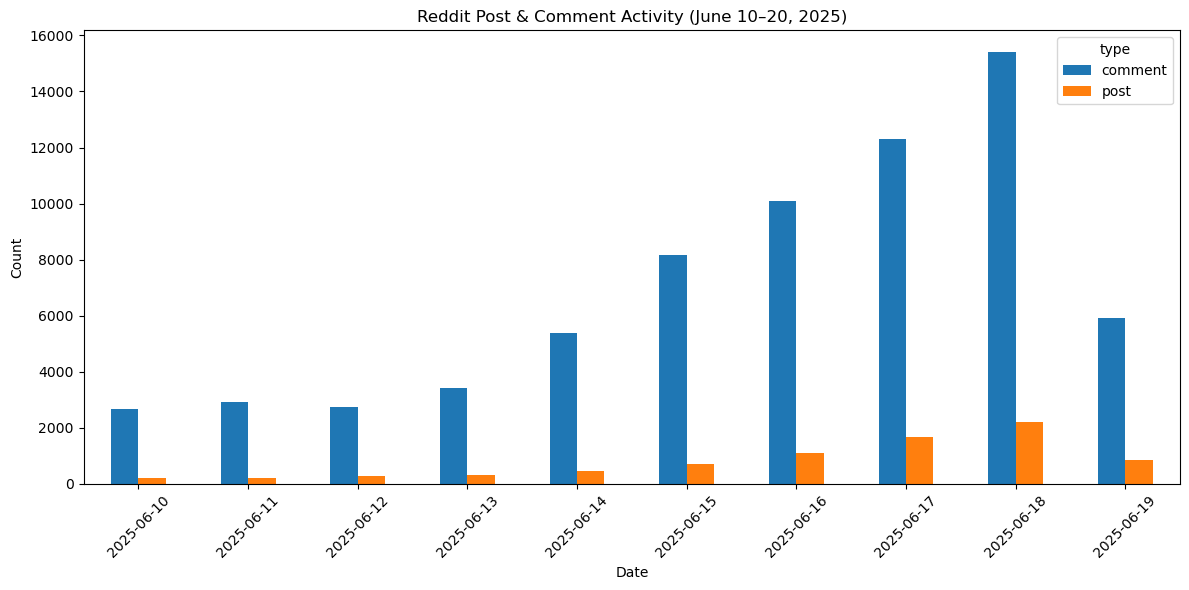

In [2]:
import matplotlib.pyplot as plt

filtered_df['date'] = filtered_df['created_utc'].dt.date
daily_counts = filtered_df.groupby(['date', 'type']).size().unstack(fill_value=0)

daily_counts.plot(kind='bar', figsize=(12, 6))
plt.title("Reddit Post & Comment Activity (June 10–20, 2025)")
plt.ylabel("Count")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data Pre-Processing

In [7]:
# ======================
# 1. PATH CONFIGURATION
# ======================
# Getting current working directory
current_dir = os.getcwd()

# Defining path to 'output' folder
output_dir = os.path.join(current_dir, 'output')

# Defining file paths
input_file = os.path.join(output_dir, 'reddit_mentalhealth_combined.csv')
output_file = os.path.join(output_dir, 'reddit_mentalhealth_processed_with_stopwords.csv')

In [8]:
# install only once
# pip install contractions
# !pip install googletrans

In [9]:
import nltk
# nltk.download()

# Ensure required NLTK resources are downloaded
# nltk.download('punkt')
# nltk.download('stopwords')

In [10]:
import os
import pandas as pd
import re
import emoji
import unicodedata
import string
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from translatepy import Translator
from tqdm import tqdm

# Enable tqdm for pandas apply
tqdm.pandas()

# ======================
# 1. TEXT CLEANING SETUP
# ======================

EMOTION_MAP = {
    "😭": "[crying]", "💔": "[broken_heart]", "😔": "[sad]",
    "😢": "[tears]", "😂": "[laughing]", "❤": "[love]",
    "🤗": "[hugging]", "😁": "[grinning]", "🤔": "[thinking]",
    "😐": "[neutral]", "🙄": "[eye_roll]"
}

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
translator = Translator()

def expand_contractions(text):
    return contractions.fix(text)

def handle_special_characters(text):
    text = str(text)
    text = re.sub(r'[\u200b-\u200f\u202a-\u202e]', '', text)
    text = re.sub(r'[❤♡♥]', '[heart]', text)
    text = re.sub(r'[★☆✮✯]', '[star]', text)
    text = unicodedata.normalize('NFKD', text)
    return text.encode('ascii', 'ignore').decode('ascii')

def process_emojis(text):
    text = emoji.demojize(text, delimiters=("[emoji:", "]"))
    for emoji_char, label in EMOTION_MAP.items():
        text = text.replace(emoji.demojize(emoji_char), label)
    return text

def translate_to_english(text):
    try:
        if not text.strip():
            return text  # Skip empty text
        result = translator.translate(text, "English")
        translated_text = result.result
        if translated_text.strip().lower() == text.strip().lower():
            return text  # Assume already English
        else:
            return translated_text
    except Exception as e:
        print(f"Translation error: {e}")
        return text

def clean_text(text):
    text = str(text).lower()
    text = translate_to_english(text)
    text = expand_contractions(text)
    text = handle_special_characters(text)
    text = process_emojis(text)
    text = re.sub(r"[_?.’,'\-()\/0-9]", ' ', text)

    tokens = []
    for token in word_tokenize(text):
        if (
            token in stop_words and
            token not in punctuation and
            (token.isalpha() or 
             token.startswith(('[emoji:', '[heart]', '[star]')) or
             token in EMOTION_MAP.values())
        ):
            tokens.append(token)
    return ' '.join(tokens)

try:
    df = pd.read_csv(input_file)
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

df['title'] = df['title'].astype(str).str.strip()
df['text'] = df['text'].astype(str).str.strip()

df = df[~((df['title'] == '') & (df['text'] == ''))]
df = df[~df['text'].str.lower().isin(['removed', 'deleted'])]
df['text'] = df['text'].apply(lambda x: ' '.join(x.split()[:400]))

# Apply clean_text with progress bar
df['title'] = df['title'].progress_apply(clean_text)
df['text'] = df['text'].progress_apply(clean_text)

df['processed_text'] = df['title'] + " " + df['text']
df['processed_text'] = df['processed_text'].str.replace(r'^(title|nan)\s+', '', regex=True)
df = df[df['processed_text'].str.strip() != '']

# ======================
# 3. SAVE OUTPUT
# ======================

try:
    df.to_csv(output_file, index=False)
    print("Cleaned data saved successfully to:", output_file)
except Exception as e:
    print(f"Error saving file: {e}")


 52%|█████▏    | 55610/106314 [5:02:54<46:09:41,  3.28s/it] 

Translation error: No service has returned a valid result


100%|██████████| 106314/106314 [9:30:06<00:00,  3.11it/s]  


Cleaned data saved successfully to: C:\Users\praja\Downloads\UOA - FYP\FYP\output\reddit_mentalhealth_processed_with_stopwords.csv


In [3]:
# Getting current working directory
current_dir = os.getcwd()

# Defining path to 'output' folder
output_dir = os.path.join(current_dir, 'output')

# Defining file paths
input_file = os.path.join(output_dir, 'reddit_mentalhealth_processed.csv')
df = pd.read_csv(input_file)
df

,type,post_id,comment_id,author,created_utc,score,title,text,subreddit,flair,url,parent_id,upvote_ratio,upvotes,downvotes,processed_text
0,post,1lf4g6e,NaN,Medical-Teaching-405,2025-06-19T07:11:08,1,life quite expected,hello dark place last years reached lowest poi...,depression,NaN,https://www.reddit.com/r/depression/comments/1...,NaN,1.00,1,0,life quite expected hello dark place last year...
1,post,1lf4emr,NaN,Ok-Broccoli-1906,2025-06-19T07:08:25,1,things right,literally nothing ever go right anymore makes ...,depression,NaN,https://www.reddit.com/r/depression/comments/1...,NaN,1.00,1,0,things right literally nothing ever go right a...
2,post,1lf4bx2,NaN,AsideSuper7951,2025-06-19T07:03:32,1,anything life becoming depressing,listen seriously asking happiness child life s...,depression,NaN,https://www.reddit.com/r/depression/comments/1...,NaN,1.00,1,0,anything life becoming depressing listen serio...
3,post,1lf4bva,NaN,Glass_Marionberry_33,2025-06-19T07:03:27,1,feeling really alone need someone kind talk call,hi really hard time right need someone kind ta...,depression,NaN,https://www.reddit.com/r/depression/comments/1...,NaN,1.00,1,0,feeling really alone need someone kind talk ca...
4,post,1lf48hv,NaN,Bannatan,2025-06-19T06:57:44,1,numb cw vent,kind new still figuring functions forgive xd s...,depression,NaN,https://www.reddit.com/r/depression/comments/1...,NaN,1.00,1,0,numb cw vent kind new still figuring functions...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105217,post,1lc1j7t,NaN,Joanna_Flock,2025-06-15T14:23:57,6,fathers day tough anyone else,tw emotional abuse mental abuse struggling lot...,CPTSD,Trigger Warning: Physical Abuse,https://www.reddit.com/r/CPTSD/comments/1lc1j7...,NaN,0.88,6,0,fathers day tough anyone else tw emotional abu...
105218,comment,1lc1j7t,mxwvr2i,AutoModerator,2025-06-15T14:23:57,1,NaN,hello welcome r cptsd immediate danger crisis ...,CPTSD,NaN,NaN,t3_1lc1j7t,NaN,1,0,hello welcome r cptsd immediate danger crisis...
105219,comment,1lc1j7t,mxynue7,HaynusSmoot,2025-06-15T19:55:56,1,NaN,sorry going father day difficult,CPTSD,NaN,NaN,t3_1lc1j7t,NaN,1,0,sorry going father day difficult
105220,post,1lc1iek,NaN,-Distraction-,2025-06-15T14:22:55,1,emotional truck get back,feel like hit emotional truck three weeks know...,CPTSD,Question,https://www.reddit.com/r/CPTSD/comments/1lc1ie...,NaN,0.67,1,0,emotional truck get back feel like hit emotion...


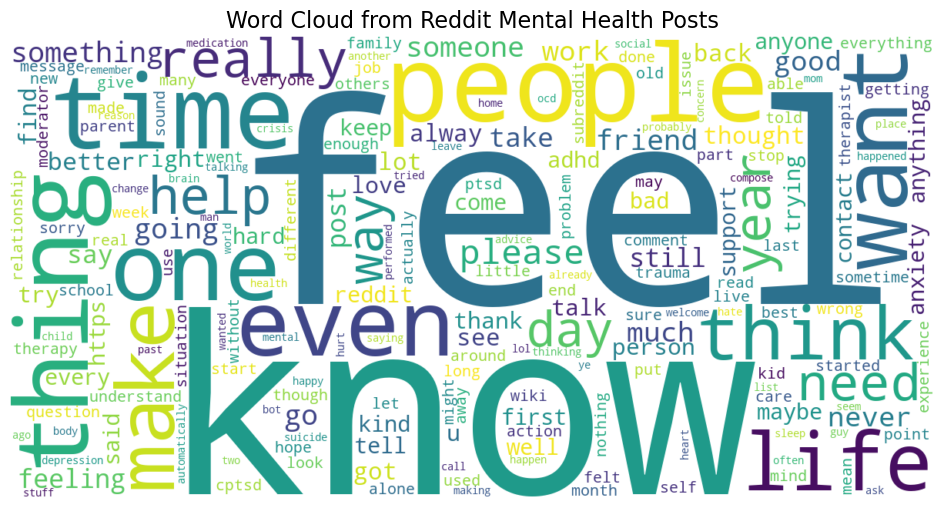

In [5]:
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(df['processed_text'].astype(str).tolist())

# Step 6: Generate the word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white', collocations=False).generate(all_text)

# Step 7: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Reddit Mental Health Posts', fontsize=16)
plt.show()

**Checking any other noises (except text)**

In [19]:
# # Getting current working directory
# current_dir = os.getcwd()

# # Defining path to 'output' folder
# output_dir = os.path.join(current_dir, 'output')

# # Defining full path to the CSV file
# output_file = os.path.join(output_dir, 'reddit_mentalhealth_processed.csv')

# # Loading CSV using pandas
# df = pd.read_csv(output_file)

# # Function to extract unique non-a-z characters from text
# def extract_nonaz_chars(text):
#     return re.findall(r'[^a-z\s]', str(text).lower())

# # Apply to title and text
# df['title_nonaz_chars'] = df['title'].apply(extract_nonaz_chars)
# df['text_nonaz_chars'] = df['text'].apply(extract_nonaz_chars)

# # Optional: Flatten and count frequency of non-a-z characters across all titles and texts
# from collections import Counter

# all_title_chars = [char for sublist in df['title_nonaz_chars'] for char in sublist]
# all_text_chars = [char for sublist in df['text_nonaz_chars'] for char in sublist]

# title_char_counts = Counter(all_title_chars)
# text_char_counts = Counter(all_text_chars)

# # Show top 10 most common non-a-z characters
# print("🔤 Top non-a-z characters in titles:", title_char_counts.most_common(10))
# print("🔤 Top non-a-z characters in text:", text_char_counts.most_common(10))


**Unicode noises**

                          title  \
129  since kidnapped life sucks   
353                         nan   
419                        gave   
470      dealing eating attacks   
619                         nan   

                                                  text  
129  life absolute shit since suffered kidnapping h...  
353          cant even leave house thanks í appreciate  
419  dont want nothing anymore life á nightmare bul...  
470  summer worst time year mother grandfather gran...  
619  yea also different fruit purées prefer kinda l..

**Emoji and Language noises**

🔤 Top non-a-z characters in titles: [('и', 10), ('😭', 8), ('ي', 7), ('ا', 6), ('а', 6), ('️', 5), ('ل', 5), ('ه', 5), ('م', 4), ('💔', 4)]

🔤 Top non-a-z characters in text: [('️', 1110), ('😂', 608), ('❤', 589), ('😭', 498), ('\u200d', 342), ('ا', 286), ('🤣', 283), ('😅', 258), ('🤷', 226), ('ل', 190)]

Those characters are mostly:

Emojis (e.g., 😂, 😭, 💔, 🤷)

Arabic letters (e.g., ا, ل, ه)

Cyrillic letters (e.g., и, а)

Invisible characters (e.g., \u200d is zero-width joiner)

Unicode symbols (like ❤)

**Character noises**

🔤 Top non-a-z characters in titles: [('_', 2096), ('?', 147), ('.', 79), (',', 58), ('’', 55), ("'", 40), ('2', 25), ('-', 20), ('0', 14), ('/', 14)]


🔤 Top non-a-z characters in text: [('.', 11262), (',', 7081), ('’', 4228), ("'", 2639), ('?', 913), ('-', 770), (')', 698), ('(', 660), ('0', 651), ('2', 600)]

In [20]:
# import re

# # Case-insensitive search for 'xd' as a whole word
# xd_pattern = r'\bxd\b'

# # Count in 'title' column
# xd_title_count = df['title'].str.lower().str.count(xd_pattern).sum()

# # Count in 'text' column
# xd_text_count = df['text'].str.lower().str.count(xd_pattern).sum()

# # Total count
# xd_total = xd_title_count + xd_text_count

# print(f"\n🔍 Count of 'xd' in titles: {int(xd_title_count)}")
# print(f"🔍 Count of 'xd' in text:   {int(xd_text_count)}")
# print(f"✅ Total 'xd' occurrences:  {int(xd_total)}")


**Baseline Modeling (before deep models)**
- It gives you a simple, interpretable, fast benchmark.
- Helps to check data quality, feature usefulness, and label separability before committing to more complex and expensive models (like LLMs or graph neural networks).

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("output/reddit_mentalhealth_processed.csv")

# Prepare combined text
df["title"] = df["title"].fillna("")
df["processed_text"] = df["processed_text"].fillna("")
df["full_text"] = df["title"] + " " + df["processed_text"]

# Drop rows missing labels
df.dropna(subset=["subreddit"], inplace=True)

# Encode labels (subreddit)
le = LabelEncoder()
df["encoded_label"] = le.fit_transform(df["subreddit"])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df["full_text"], df["encoded_label"],
    test_size=0.2, random_state=42, stratify=df["encoded_label"]
)

# TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Evaluation
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=le.classes_))

Accuracy: 0.5019524817689955

Classification Report:
                     precision    recall  f1-score   support

              ADHD       0.62      0.55      0.58      1846
           Anxiety       0.60      0.41      0.49       651
               BPD       0.63      0.31      0.42       716
             CPTSD       0.52      0.33      0.41      1094
DecidingToBeBetter       0.35      0.23      0.28      1149
         KindVoice       0.65      0.39      0.49       499
               OCD       0.82      0.45      0.58       725
      SuicideWatch       0.38      0.15      0.22       330
    TrueOffMyChest       0.46      0.30      0.36      2490
        confession       0.48      0.88      0.62      6763
        depression       0.23      0.08      0.12       400
   depression_help       0.58      0.30      0.39       475
            lonely       0.42      0.27      0.33       811
      mentalhealth       0.40      0.08      0.13       416
        offmychest       0.23      0.02      

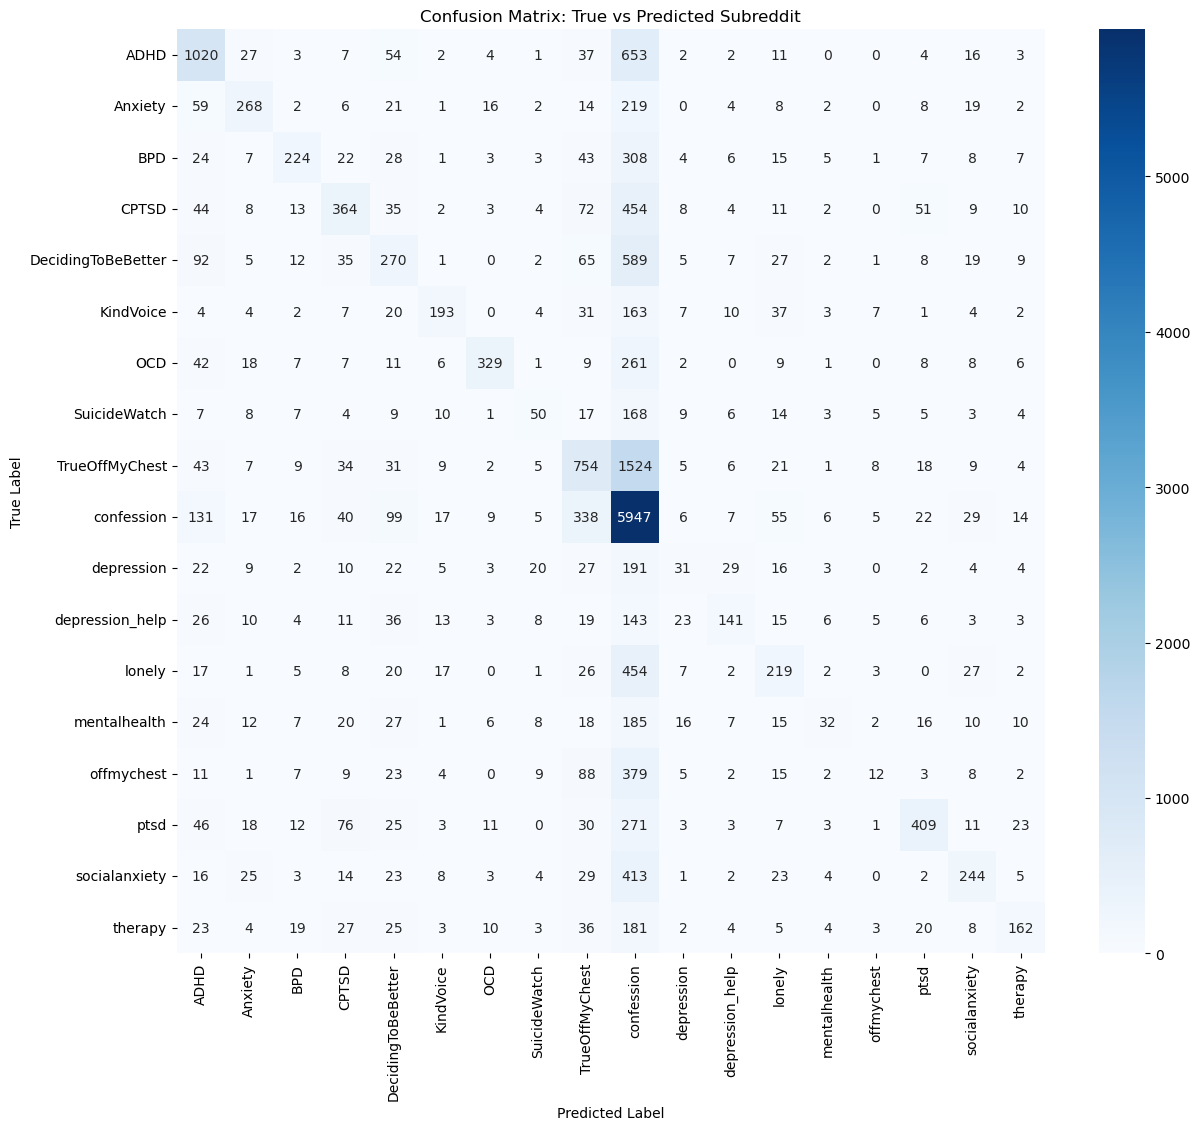

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test and y_pred from your model

cm = confusion_matrix(y_test, y_pred)
labels = le.classes_

plt.figure(figsize=(14,12))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: True vs Predicted Subreddit')
plt.show()

Got it! You’re saying that “confession” posts are kind of like a big catch-all bucket in your data — a lot of posts get classified as “confession” by the model, but actually those posts belong to other more specific subreddits you want to predict.

So you want to go beyond just “confession” as a label, and figure out which actual specific subreddit a confession post belongs to — kind of treating “confession” as a broad wrapper, then further breaking it down into the real category it should be in.

What this means for your problem:
Your model currently lumps too many posts into “confession” because that class is very frequent and overlaps in language with others.

Instead, you want a way to:

Detect a post is a “confession” type first (or identify if it falls into that broad category)

Then classify the confession post into the more specific, correct subreddit category (e.g., ADHD, Anxiety, Depression, etc.)

How to approach this?
One common way is a two-step hierarchical classification:

Step 1: Build a binary or multi-class model that detects if a post is “confession” or “non-confession.”

Step 2: For those posts predicted as “confession,” apply a second model trained specifically to classify confession posts into the finer-grained categories (ADHD, Anxiety, BPD, etc.).



In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# ===== Step 1: Binary classification confession vs non-confession =====

# Create binary target for Step 1
df['is_confession'] = (df['subreddit'] == 'confession').astype(int)

# Prepare text features and target
X = df['processed_text']  # or use your text column
y = df['is_confession']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Vectorize text with TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train binary logistic regression
clf_bin = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
clf_bin.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_bin = clf_bin.predict(X_test_tfidf)
print("Step 1 - Confession vs Non-Confession")
print("Accuracy:", accuracy_score(y_test, y_pred_bin))
print(classification_report(y_test, y_pred_bin))

Step 1 - Confession vs Non-Confession
Accuracy: 0.7320159962361797
              precision    recall  f1-score   support

           0       0.87      0.72      0.78     14492
           1       0.56      0.77      0.65      6763

    accuracy                           0.73     21255
   macro avg       0.71      0.74      0.71     21255
weighted avg       0.77      0.73      0.74     21255



In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("output/reddit_mentalhealth_processed.csv")

# Prepare combined text
df["title"] = df["title"].fillna("")
df["processed_text"] = df["processed_text"].fillna("")
df["full_text"] = df["title"] + " " + df["processed_text"]

# Drop rows missing labels
df.dropna(subset=["subreddit"], inplace=True)

# **Exclude 'confession' subreddit posts**
df = df[df["subreddit"] != "confession"]

# Encode labels (subreddit)
le = LabelEncoder()
df["encoded_label"] = le.fit_transform(df["subreddit"])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df["full_text"], df["encoded_label"],
    test_size=0.2, random_state=42, stratify=df["encoded_label"]
)

# TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Evaluation
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=le.classes_))

Accuracy: 0.45763179685343636

Classification Report:
                     precision    recall  f1-score   support

              ADHD       0.52      0.69      0.60      1846
           Anxiety       0.58      0.44      0.50       651
               BPD       0.62      0.35      0.45       716
             CPTSD       0.46      0.39      0.42      1094
DecidingToBeBetter       0.34      0.37      0.35      1149
         KindVoice       0.63      0.41      0.50       499
               OCD       0.79      0.48      0.60       725
      SuicideWatch       0.37      0.18      0.24       330
    TrueOffMyChest       0.38      0.76      0.51      2490
        depression       0.21      0.09      0.12       400
   depression_help       0.63      0.32      0.42       475
            lonely       0.35      0.36      0.35       811
      mentalhealth       0.37      0.07      0.12       416
        offmychest       0.28      0.06      0.10       580
              ptsd       0.68      0.45     

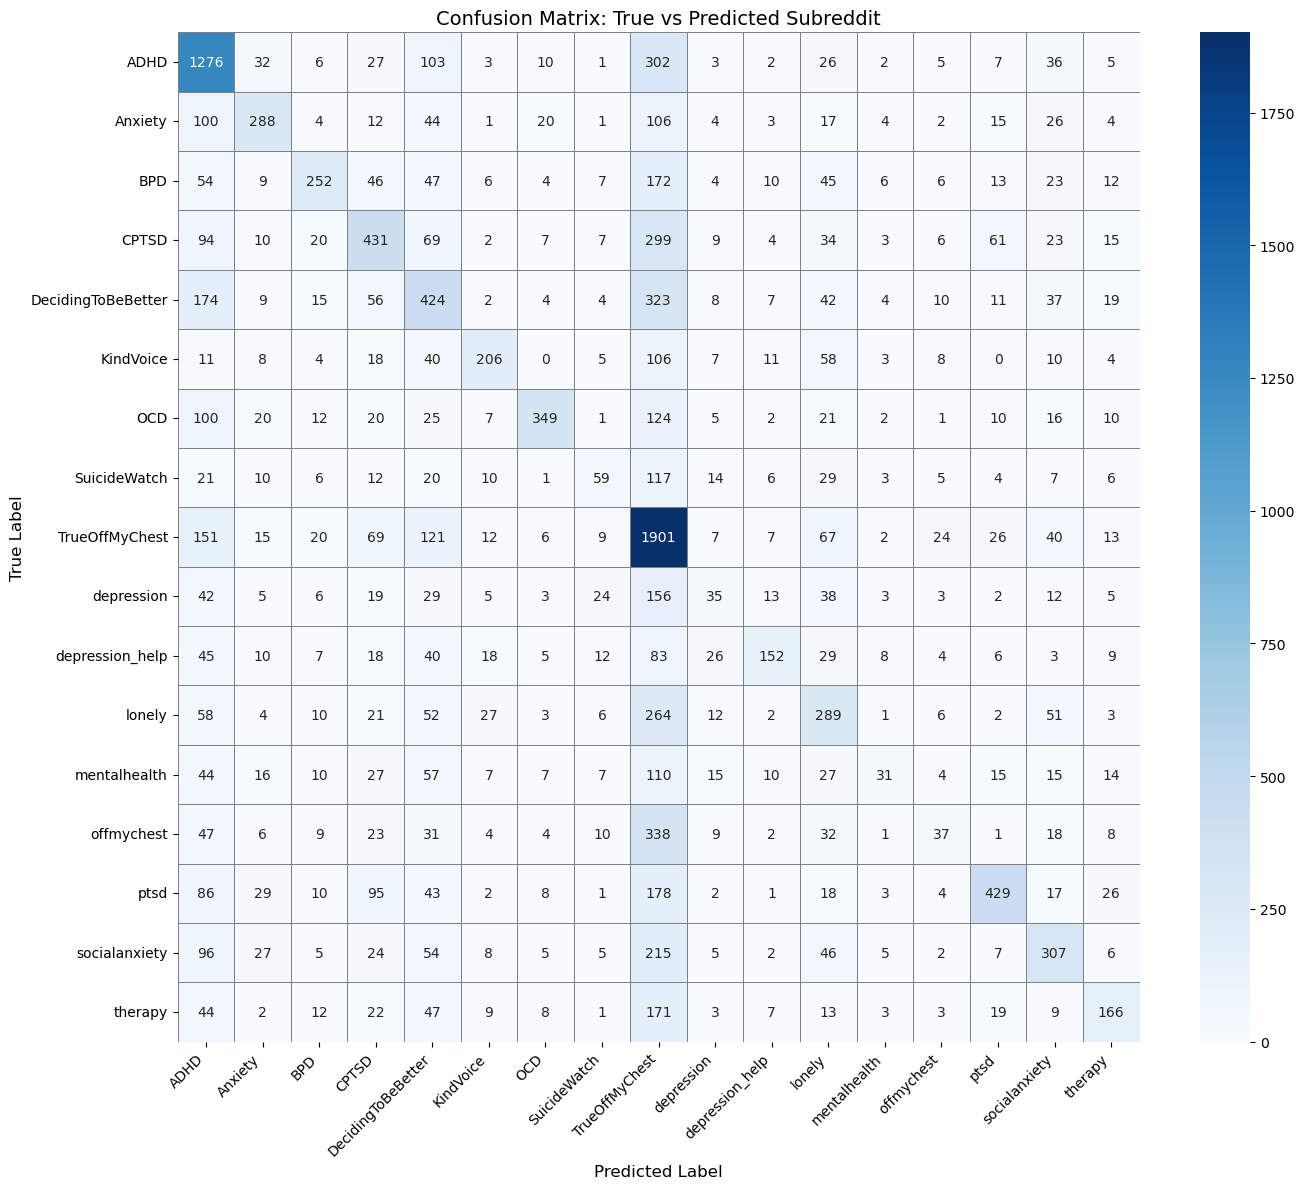

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = le.classes_

# Plotting
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            linewidths=0.5, linecolor='gray')

plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix: True vs Predicted Subreddit', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# pip uninstall keras -y

In [ ]:
# pip install tf-keras

In [ ]:
# pip install transformers==4.37.0

**Building a bert-base-uncased for multi-class classification:**

In [2]:
import transformers
print(transformers.__version__)


4.53.2


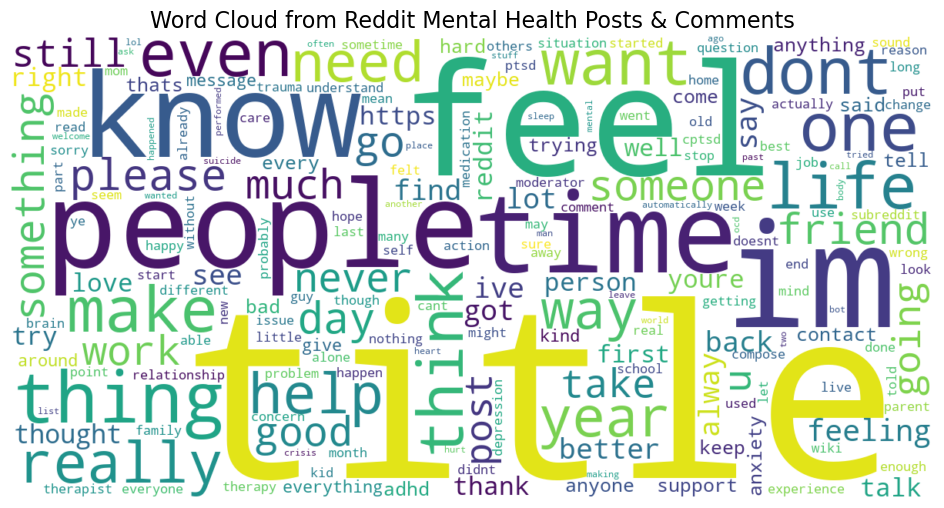

In [19]:
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df['combined_text'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
all_text = ' '.join(df['combined_text'].astype(str).tolist())

# Step 6: Generate the word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white', collocations=False).generate(all_text)

# Step 7: Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Reddit Mental Health Posts & Comments', fontsize=16)
plt.show()

NameError: name 'model_embed' is not defined